# General structure of a parcels simulation

Tutorials page: https://nbviewer.jupyter.org/github/OceanParcels/parcels/tree/master/parcels/examples/

In [1]:
import xarray as xr
import numpy as np
from datetime import timedelta
from parcels import FieldSet, ParticleSet, AdvectionRK4, JITParticle, plotTrajectoriesFile
import format_data

INFO: Compiled ParcelsRandom ==> C:\Users\caspa\AppData\Local\Temp\parcels-tmp\libparcels_random_e9371b95-822a-46ed-a743-991abc8dde51.so


**Use our own preprocessing function to concate the 11 loose files and add coordinates + timestamps**

In [2]:
uxg = format_data.preprocess("uxg")
uyg = format_data.preprocess("uyg")

**Only use the surface layer**

In [3]:
surface_uxg = uxg.__xarray_dataarray_variable__[:,:,:,19]
surface_uyg = uyg.__xarray_dataarray_variable__[:,:,:,19]

**Put U and V velocities in one dataset**

In [6]:
surface_ds = xr.Dataset({"U": surface_uxg, "V": surface_uyg})

**Set the field**

In [8]:
variables = {"U": "U", "V": "V"}
dimensions = {"U": {"lat": "lat", "lon": "lon", "time": "time"},
              "V": {"lat": "lat", "lon": "lon", "time": "time"}}

fieldset = FieldSet.from_xarray_dataset(ds=surface_ds, variables=variables, dimensions=dimensions)

**Define particle. This one is placed in the Rotterdam Waterway, right on high tide**

In [24]:
pset = ParticleSet(fieldset=fieldset,
                   pclass=JITParticle,
                   lon=4.078,
                   lat=51.982,
                   time=timedelta(hours=9).total_seconds())

pset.show()

**Define an output file. Timesteps of the Delft3D simulation was 20 minutes, so we will use that here too**

In [26]:
output_file = pset.ParticleFile(name="surface_particle.nc", outputdt=timedelta(minutes=20))

**Execute the simulation for one day**

In [27]:
pset.execute(AdvectionRK4,
             runtime=timedelta(days=1),
             dt=timedelta(minutes=20),
             output_file=output_file)

INFO: Compiled JITParticleAdvectionRK4 ==> C:\Users\caspa\AppData\Local\Temp\parcels-tmp\c0791cc4d30958eeafb195fe13d8df0a_0.dll
INFO: Temporary output files are stored in out-JUCBSMAF.
INFO: You can use "parcels_convert_npydir_to_netcdf out-JUCBSMAF" to convert these to a NetCDF file during the run.
100% (86400.0 of 86400.0) |##############| Elapsed Time: 0:00:00 Time:  0:00:00


**Save the simulation file**

In [28]:
output_file.export()

**Clean temporary files**

In [29]:
output_file.close()

**Plot output**

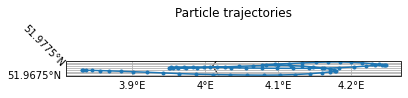

<module 'matplotlib.pyplot' from 'C:\\Users\\caspa\\Anaconda3\\envs\\py3_parcels\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [30]:
plotTrajectoriesFile('surface_particle.nc')